# Python Project: Artificial Intelligence and Predictions

### Case: Customer Credit Score

The analysis of this project consists of carrying out an EDA, using graphs and statistics to find relationships between the variables and then checking some of these relationships through statistical significance.

Finally, carry out a machine learning model to estimate the credit score of new customers

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency


First, let's import the customer base and look at some basic variables, such as the columns present and their types.

In [60]:
df = pd.read_csv(r"clientes.csv")
display(df)

id_cliente  mes  idade  profissao  salario_anual  num_contas  \
0            3392    1   23.0  cientista       19114.12         3.0   
1            3392    2   23.0  cientista       19114.12         3.0   
2            3392    3   23.0  cientista       19114.12         3.0   
3            3392    4   23.0  cientista       19114.12         3.0   
4            3392    5   23.0  cientista       19114.12         3.0   
...           ...  ...    ...        ...            ...         ...   
99995       37932    4   25.0   mecanico       39628.99         4.0   
99996       37932    5   25.0   mecanico       39628.99         4.0   
99997       37932    6   25.0   mecanico       39628.99         4.0   
99998       37932    7   25.0   mecanico       39628.99         4.0   
99999       37932    8   25.0   mecanico       39628.99         4.0   

       num_cartoes  juros_emprestimo  num_emprestimos  dias_atraso  ...  \
0              4.0               3.0              4.0          3.0  ...   
1              4.0               3.0              4.0          3.0  ...   
2              4.0               3.0              4.0          3.0  ...   
3              4.0               3.0              4.0          5.0  ...   
4              4.0               3.0              4.0          6.0  ...   
...            ...               ...              ...          ...  ...   
99995          6.0               7.0              2.0         23.0  ...   
99996          6.0               7.0              2.0         18.0  ...   
99997          6.0               7.0              2.0         27.0  ...   
99998          6.0               7.0              2.0         20.0  ...   
99999          6.0               7.0              2.0         18.0  ...   

       idade_historico_credito  investimento_mensal  \
0                        265.0            21.465380   
1                        266.0            21.465380   
2                        267.0            21.465380   
3                        268.0            21.465380   
4                        269.0            21.465380   
...                        ...                  ...   
99995                    378.0            24.028477   
99996                    379.0            24.028477   
99997                    380.0            24.028477   
99998                    381.0            24.028477   
99999                    382.0            24.028477   

           comportamento_pagamento  saldo_final_mes  score_credito  \
0      alto_gasto_pagamento_baixos       312.494089           Good   
1       baixo_gasto_pagamento_alto       284.629162           Good   
2      baixo_gasto_pagamento_medio       331.209863           Good   
3      baixo_gasto_pagamento_baixo       223.451310           Good   
4       alto_gasto_pagamento_medio       341.489231           Good   
...                            ...              ...            ...   
99995    alto_gasto_pagamento_alto       479.866228           Poor   
99996   alto_gasto_pagamento_medio       496.651610           Poor   
99997    alto_gasto_pagamento_alto       516.809083           Poor   
99998   baixo_gasto_pagamento_alto       319.164979       Standard   
99999   alto_gasto_pagamento_medio       393.673696           Poor   

       emprestimo_carro  emprestimo_casa emprestimo_pessoal  \
0                     1                1                  1   
1                     1                1                  1   
2                     1                1                  1   
3                     1                1                  1   
4                     1                1                  1   
...                 ...              ...                ...   
99995                 1                0                  0   
99996                 1                0                  0   
99997                 1                0                  0   
99998                 1                0                  0   
99999                 1                0                  

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [62]:
df.describe()

id_cliente            mes          idade  salario_anual  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    25982.666640       4.500000      33.316340   50505.123449   
std     14340.543051       2.291299      10.764812   38299.422093   
min      1006.000000       1.000000      14.000000    7005.930000   
25%     13664.500000       2.750000      24.000000   19342.972500   
50%     25777.000000       4.500000      33.000000   36999.705000   
75%     38385.000000       6.250000      42.000000   71683.470000   
max     50999.000000       8.000000      56.000000  179987.280000   

          num_contas    num_cartoes  juros_emprestimo  num_emprestimos  \
count  100000.000000  100000.000000      100000.00000    100000.000000   
mean        5.368820       5.533570          14.53208         3.532880   
std         2.593314       2.067098           8.74133         2.446356   
min         0.000000       0.000000           1.00000         0.000000   
25%         3.000000       4.000000           7.00000         2.000000   
50%         5.000000       5.000000          13.00000         3.000000   
75%         7.000000       7.000000          20.00000         5.000000   
max        11.000000      11.000000          34.00000         9.000000   

        dias_atraso  num_pagamentos_atrasados  ...   divida_total  \
count  100000.00000             100000.000000  ...  100000.000000   
mean       21.08141                 13.313120  ...    1426.220376   
std        14.80456                  6.237166  ...    1155.129026   
min         0.00000                  0.000000  ...       0.230000   
25%        10.00000                  9.000000  ...     566.072500   
50%        18.00000                 14.000000  ...    1166.155000   
75%        28.00000                 18.000000  ...    1945.962500   
max        62.00000                 25.000000  ...    4998.070000   

       taxa_uso_credito  idade_historico_credito  investimento_mensal  \
count     100000.000000            100000.000000        100000.000000   
mean          32.285173               221.220460            55.101315   
std            5.116875                99.680716            39.006932   
min           20.000000                 1.000000             0.000000   
25%           28.052567               144.000000            27.959111   
50%           32.305784               219.000000            45.156550   
75%           36.496663               302.000000            71.295797   
max           50.000000               404.000000           434.191089   

       saldo_final_mes  emprestimo_carro  emprestimo_casa  emprestimo_pessoal  \
count    100000.000000     100000.000000    100000.000000       100000.000000   
mean        392.697586          0.305600         0.511760            0.311040   
std         201.652719          0.460663         0.499864            0.462921   
min           0.007760          0.000000         0.000000            0.000000   
25%         267.615983          0.000000         0.000000            0.000000   
50%         333.865366          0.000000         1.000000            0.000000   
75%         463.215683          1.000000         1.000000            1.000000   
max        1183.930696          1.000000         1.000000            1.000000   

       emprestimo_credito  emprestimo_estudantil  
count        100000.00000           100000.00000  
mean              0.31728                0.31040  
std               0.46542                0.46266  
min               0.00000                0.00000  
25%               0.00000                0.00000  
50%               0.00000                0.00000  
75%               1.00000                1.00000  
max               1.00000                1.00000  

[8 rows x 21 columns]


Creating a heat map, we can notice that there is a high correlation between the total debt (column divida_total) and the number of accounts and cards, number of loans, interest and late payments.

On the other hand, we see a negative correlation between the balance at the end of the month (column saldo_final_mes) and monthly investments (investimento_mensal) for these same variables.

These correlations were already expected, but we always need to check them through the data.

C:\Users\fer_l\AppData\Local\Temp\ipykernel_11364\1695375475.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.drop(['id_cliente', 'mes'], axis=1).corr()


<Axes: >

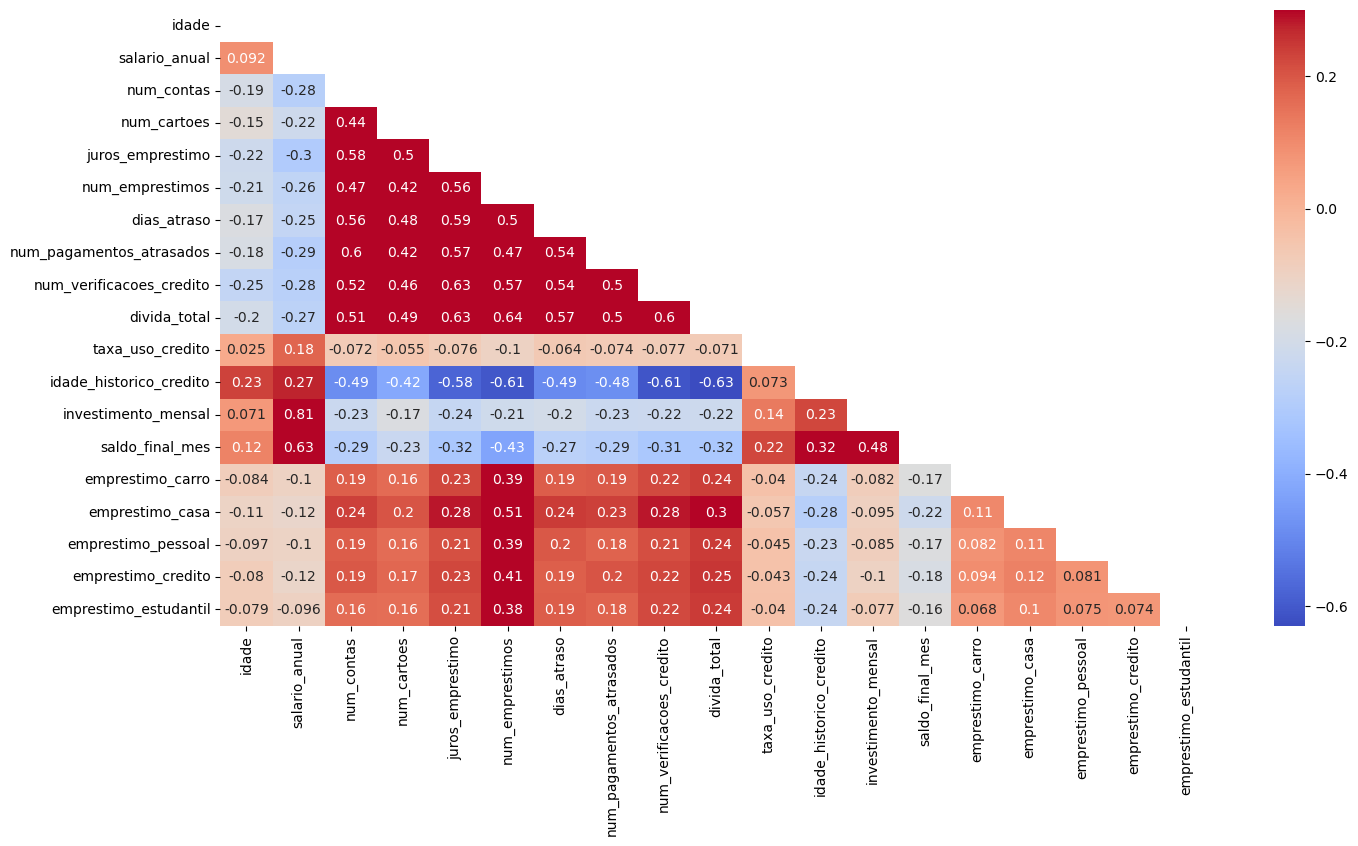

In [63]:
fig = plt.figure(figsize = (16,8))
corr_df = df.drop(['id_cliente', 'mes'], axis=1).corr()
sns.heatmap(data = corr_df,annot = True,mask = np.triu(corr_df), cmap = 'coolwarm', vmax = .3)

Now let's create some graphs to try to identify patterns.

In [64]:
print(df.columns.tolist())

['id_cliente', 'mes', 'idade', 'profissao', 'salario_anual', 'num_contas', 'num_cartoes', 'juros_emprestimo', 'num_emprestimos', 'dias_atraso', 'num_pagamentos_atrasados', 'num_verificacoes_credito', 'mix_credito', 'divida_total', 'taxa_uso_credito', 'idade_historico_credito', 'investimento_mensal', 'comportamento_pagamento', 'saldo_final_mes', 'score_credito', 'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal', 'emprestimo_credito', 'emprestimo_estudantil']


In [65]:
features = df.drop(['score_credito', 'profissao', 'id_cliente', 'mes', 'mix_credito', 'comportamento_pagamento', 'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal', 'emprestimo_credito', 'emprestimo_estudantil'], axis = 1).columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

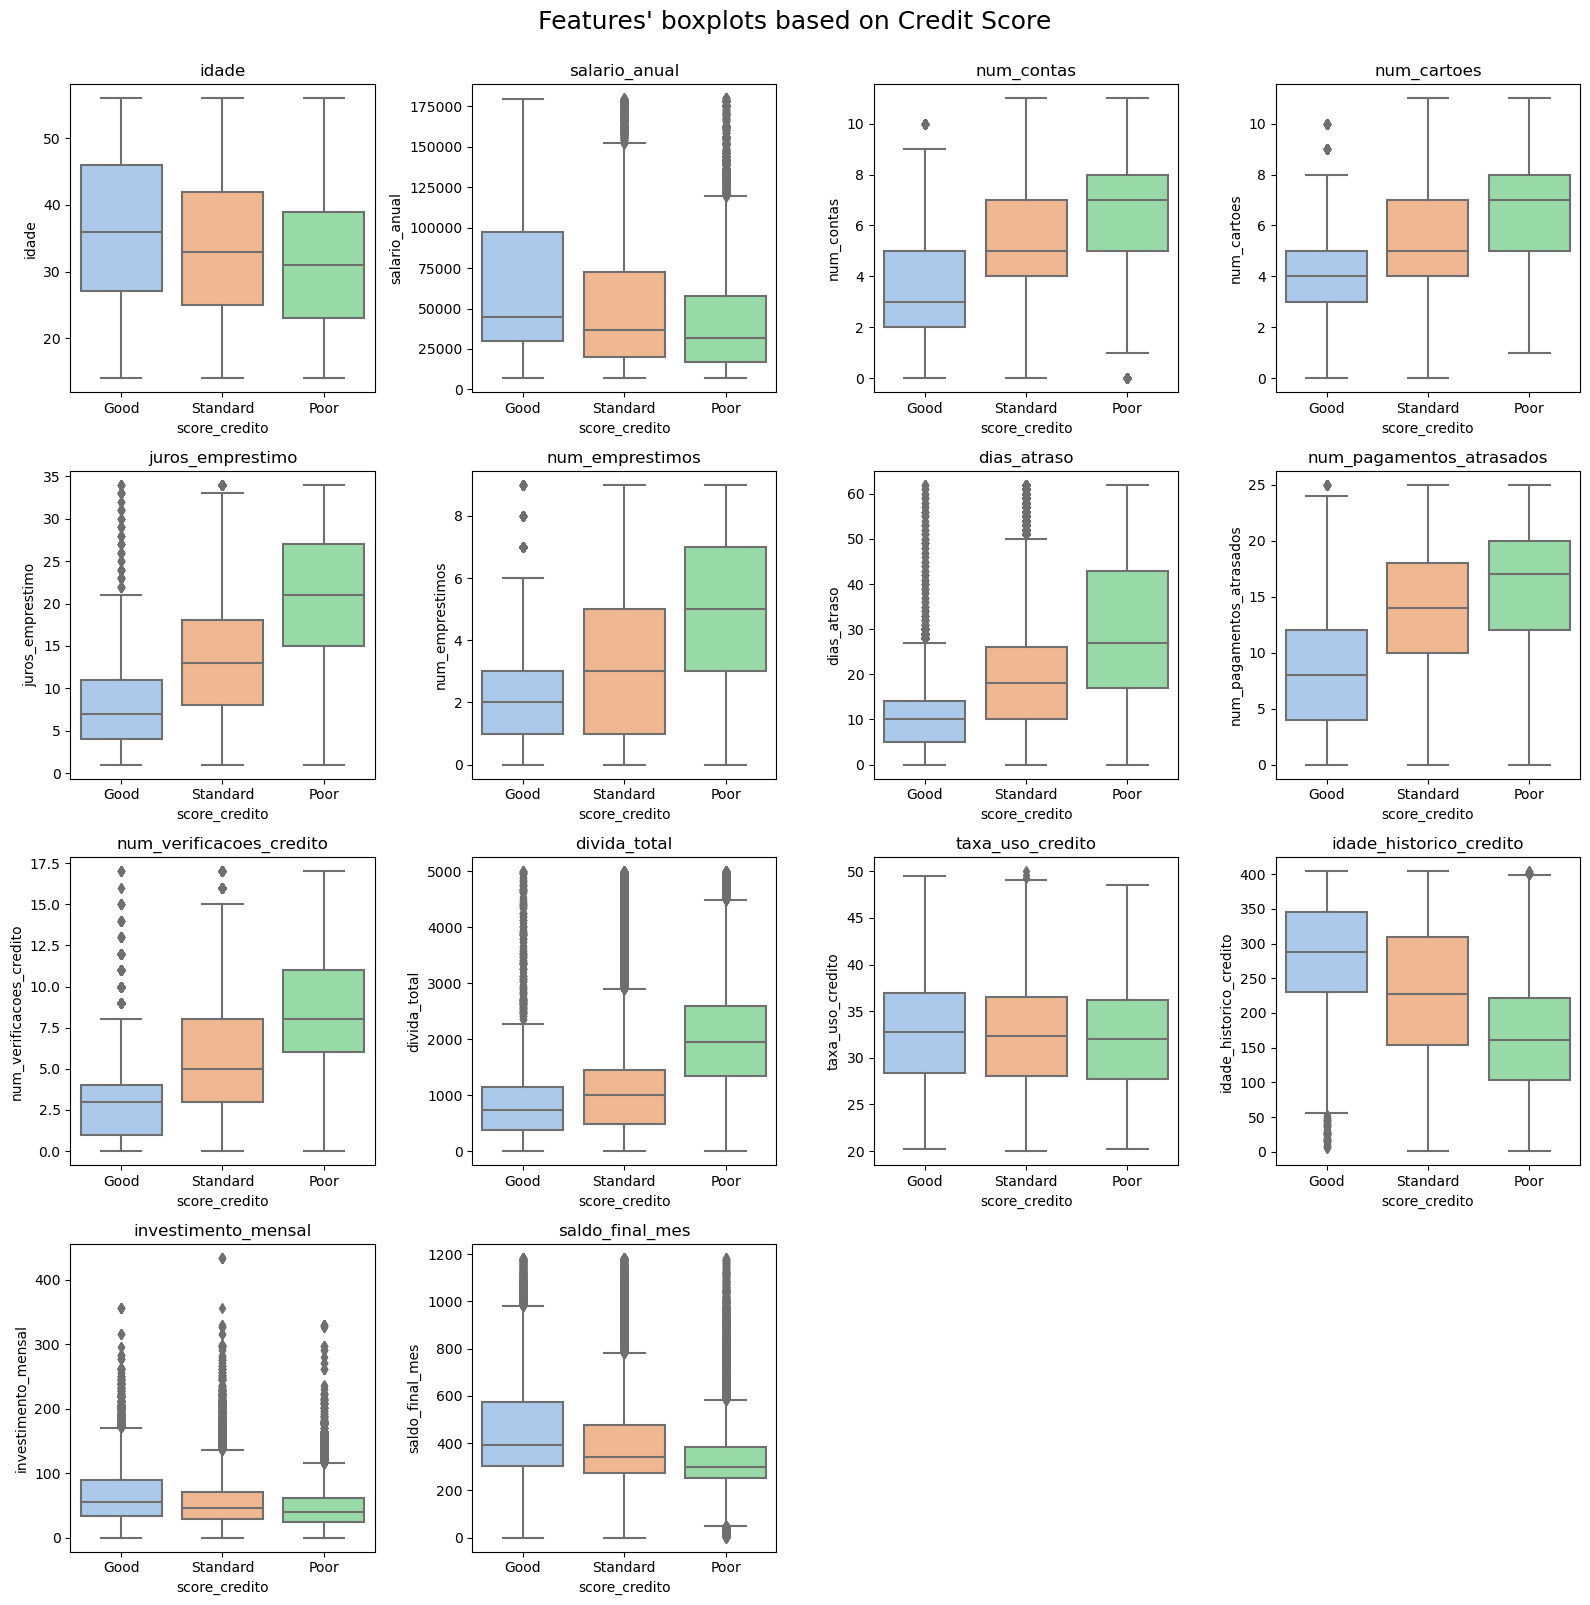

In [66]:
sns.set_palette('pastel')
fig = plt.figure(figsize = (16,16))
for i, feature in enumerate(features,1):
    plt.subplot(4,4,i)
    sns.boxplot(data = df, y = feature, x = 'score_credito')
    plt.legend(loc='upper left',frameon=False)
    plt.title(feature)
    
fig.suptitle('Features\' boxplots based on Credit Score', fontsize=18, y = 1)
plt.tight_layout()

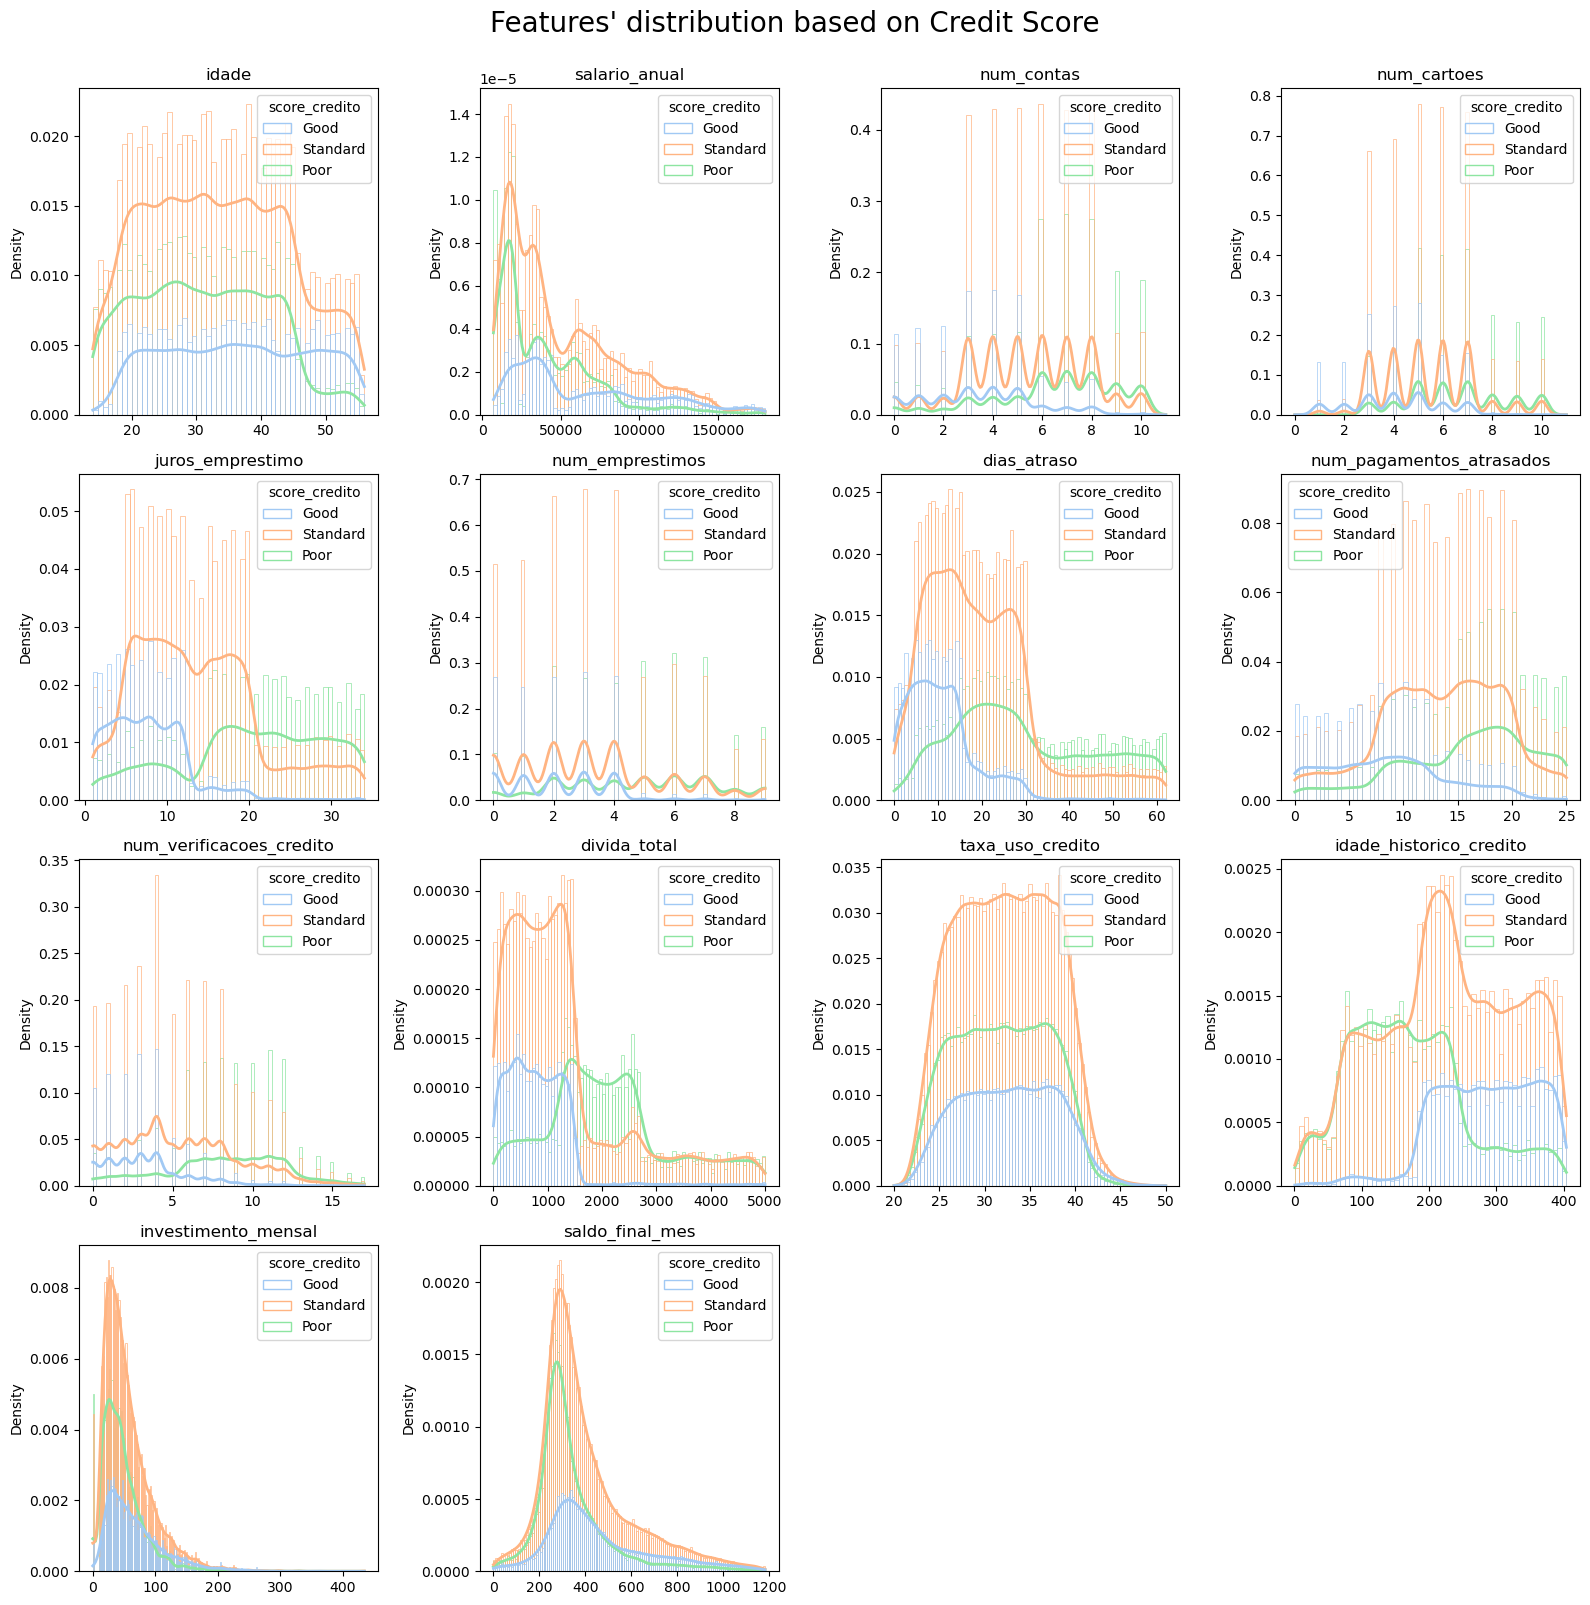

In [67]:
fig =plt.figure(figsize = (16,16))
for i, feature in enumerate(features,1):
    plt.subplot(4,4,i)
    sns.histplot(data = df, x = feature, hue = 'score_credito', kde = True, stat='density', fill=False, line_kws={'linewidth': 2})
    plt.xlabel('')
    plt.title(feature)
fig.suptitle('Features\' distribution based on Credit Score', fontsize=20, y = 1)
plt.tight_layout()

In [68]:
features_2 = features.drop(['num_emprestimos', 'num_pagamentos_atrasados', 'num_verificacoes_credito', 'num_contas', 'num_cartoes', 'idade_historico_credito'])
print(features_2)

Index(['idade', 'salario_anual', 'juros_emprestimo', 'dias_atraso',
       'divida_total', 'taxa_uso_credito', 'investimento_mensal',
       'saldo_final_mes'],
      dtype='object')


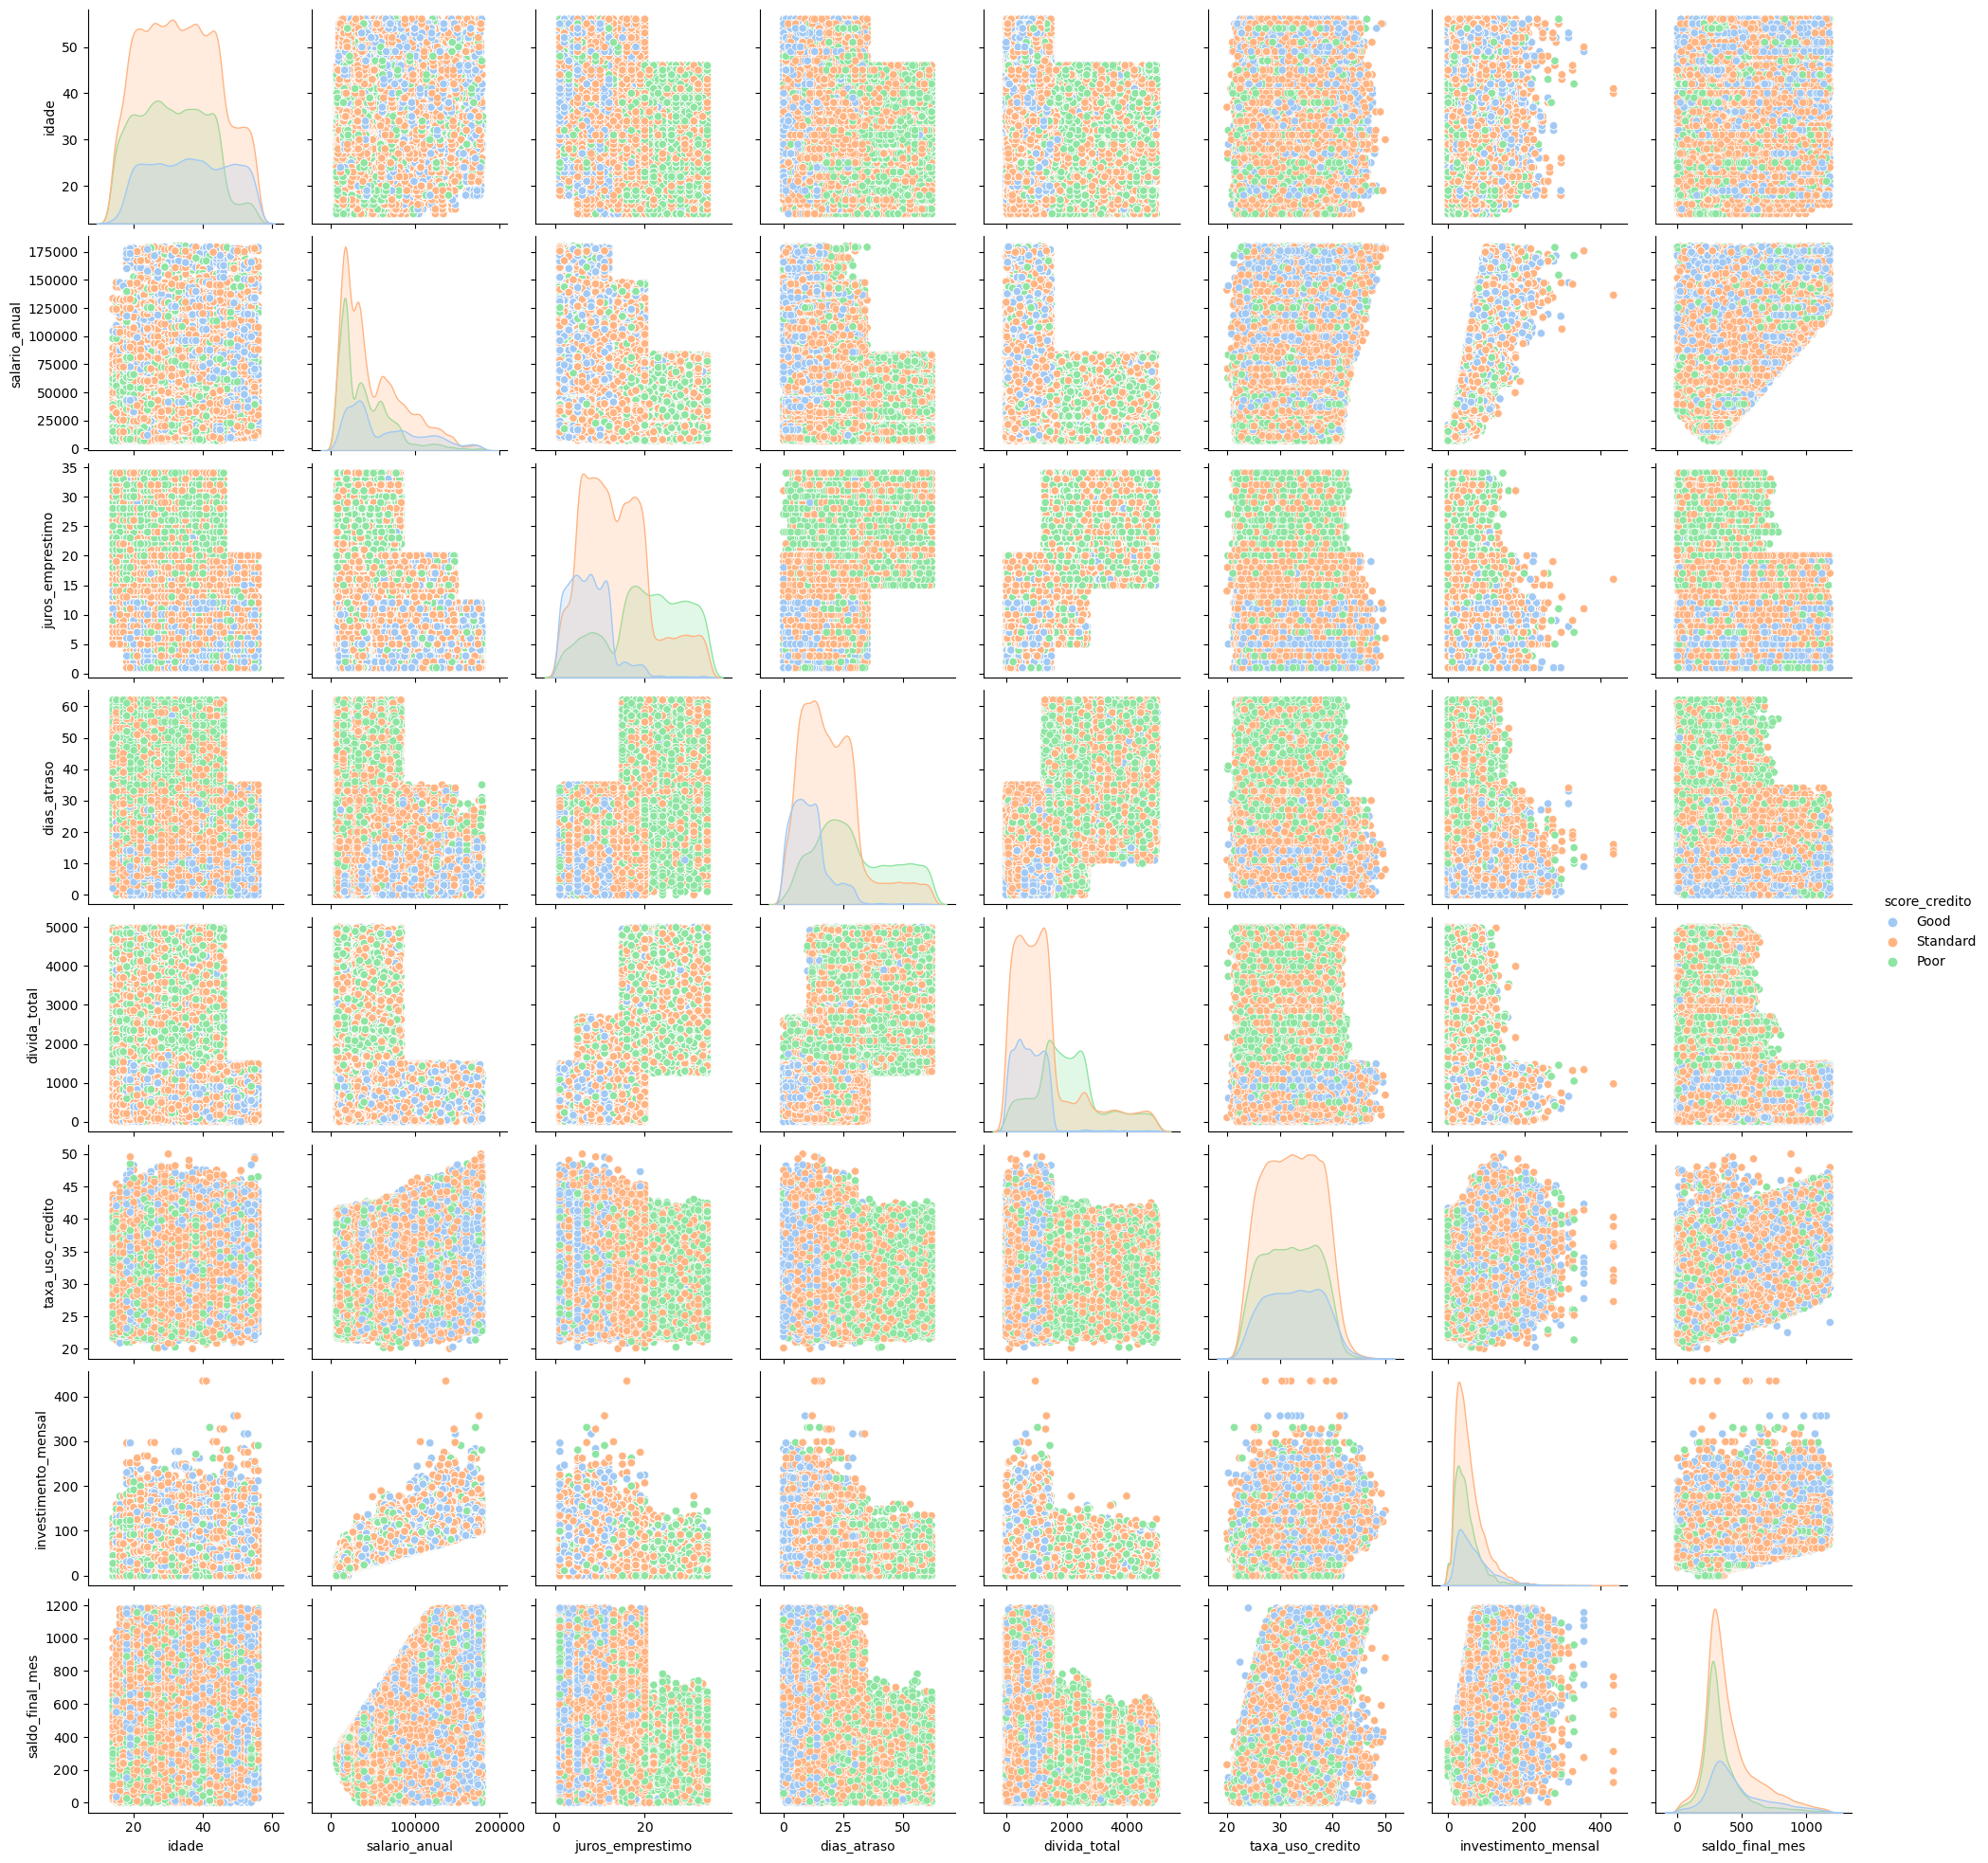

In [69]:

sns.pairplot(df[['score_credito', 'idade', 'salario_anual', 'juros_emprestimo', 'dias_atraso',
       'divida_total', 'taxa_uso_credito', 'investimento_mensal',
       'saldo_final_mes']], hue='score_credito')
plt.show()


Although we can see that the annual salary between the Poor and Standard classifications is similar, the number of cards, accounts and loans for Poor is higher. All of these variables, as we saw previously, have a high correlation with total debt.

Now let's analyze the score distribution by profession.

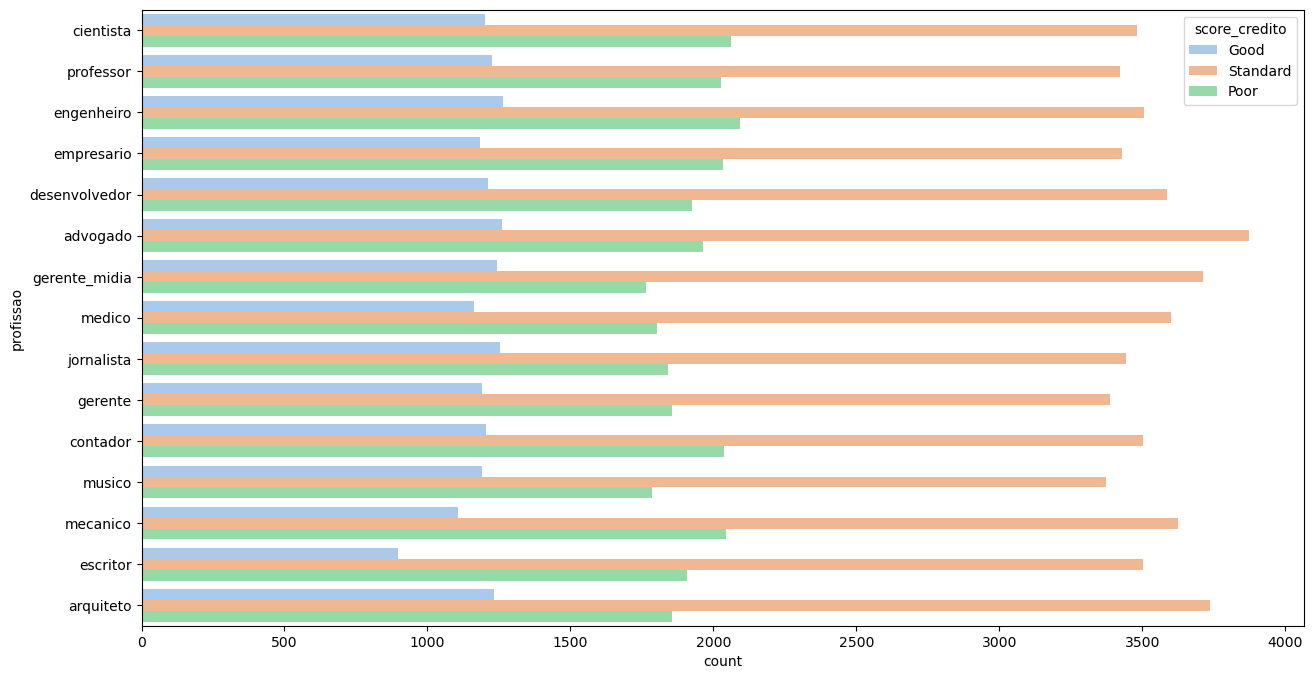

In [70]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(y='profissao', hue='score_credito', data=df)
plt.show()

In [71]:
count = pd.crosstab(df['profissao'], df['score_credito'], normalize='index')
count_perc = (count * 100).round(2)
print(count_perc)

score_credito   Good   Poor  Standard
profissao                            
advogado       17.74  27.69     54.57
arquiteto      18.07  27.18     54.75
cientista      17.81  30.58     51.62
contador       17.87  30.20     51.93
desenvolvedor  18.01  28.63     53.36
empresario     17.82  30.58     51.59
engenheiro     18.41  30.51     51.08
escritor       14.21  30.25     55.54
gerente        18.50  28.86     52.64
gerente_midia  18.51  26.25     55.24
jornalista     19.19  28.15     52.66
mecanico       16.34  30.17     53.50
medico         17.72  27.47     54.81
musico         18.77  28.12     53.12
professor      18.35  30.38     51.27



We can observe that there is a strong similarity in the distribution, so we created 2 hypotheses to test:

Null Hypothesis (H0): There is no significant difference between score for each profession.

Alternative Hypothesis (H1): There is significant difference between score for each profession.

The chi-square test of independence was chosen due to its suitability analyzing relationships between categorical variables, such as professions and credit ratings, providing insights into whether there is a significant association between them.

In [72]:
table = pd.crosstab(df['profissao'], df['score_credito'])

chi2, p, dof, expected = chi2_contingency(table)

print('Chi-square test statistics:')
print("Chi-square value: ", chi2)
print("P-value value: ", p)

Chi-square test statistics:
Chi-square value:  180.68588839512742
P-value value:  2.907103747503745e-24


In [73]:
alpha = 0.05
if p < alpha:
    print("Professions have an effect on credit score.")
else:
    print("Professions do not affect credit score.")

Professions have an effect on credit score.


Finally, we will create 3 machine learning models (Random Forest, KNN and Gaussian NB) and analyze which is the most accurate.

Then import a new database containing new customers and ask the model to estimate the credit score for each of these customers.

In [74]:
#transforming all columns in numbers
codify = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object" and column != "score_credito":
        df[column] = codify.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int32  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

In [75]:
#setting parameters
y = df["score_credito"]
x = df.drop(["score_credito", "id_cliente"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
#training models
model_random_forest = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_gnb = GaussianNB()

model_random_forest.fit(x_train, y_train)
model_knn.fit(x_train, y_train)
model_gnb.fit(x_train, y_train)

GaussianNB()

In [77]:
#checking model accuracy
prevision_random_forest = model_random_forest.predict(x_test)
prevision_knn = model_knn.predict(x_test.to_numpy())
prevision_gnb = model_gnb.predict(x_test)

print(accuracy_score(y_test, prevision_random_forest))
print(accuracy_score(y_test, prevision_knn))
print(accuracy_score(y_test, prevision_gnb))

c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8239666666666666
0.7369
0.5979


In [78]:
#importing new data
new_clients = pd.read_csv("novos_clientes.csv")
new_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       3 non-null      int64  
 1   idade                     3 non-null      float64
 2   profissao                 3 non-null      object 
 3   salario_anual             3 non-null      float64
 4   num_contas                3 non-null      float64
 5   num_cartoes               3 non-null      float64
 6   juros_emprestimo          3 non-null      float64
 7   num_emprestimos           3 non-null      float64
 8   dias_atraso               3 non-null      float64
 9   num_pagamentos_atrasados  3 non-null      float64
 10  num_verificacoes_credito  3 non-null      float64
 11  mix_credito               3 non-null      object 
 12  divida_total              3 non-null      float64
 13  taxa_uso_credito          3 non-null      float64
 14  idade_historic

In [79]:
for column in new_clients.columns:
    if new_clients[column].dtype == "object" and column != "score_credito":
        new_clients[column] = codify.fit_transform(new_clients[column])

In [80]:
#estimating credit score through the random forest model 
display(new_clients)
prevision = model_random_forest.predict(new_clients)
print(prevision)

mes  idade  profissao  salario_anual  num_contas  num_cartoes  \
0    1   31.0          1      19300.340         6.0          7.0   
1    4   32.0          0      12600.445         5.0          5.0   
2    2   48.0          1      20787.690         8.0          6.0   

   juros_emprestimo  num_emprestimos  dias_atraso  num_pagamentos_atrasados  \
0              17.0              5.0         52.0                      19.0   
1              10.0              3.0         25.0                      18.0   
2              14.0              7.0         24.0                      14.0   

   ...  taxa_uso_credito  idade_historico_credito  investimento_mensal  \
0  ...         29.934186                    218.0             44.50951   
1  ...         28.819407                     12.0              0.00000   
2  ...         34.235853                    215.0              0.00000   

   comportamento_pagamento  saldo_final_mes  emprestimo_carro  \
0                        1       312.487689                 1   
1                        2       300.994163                 0   
2                        0       345.081577                 0   

   emprestimo_casa  emprestimo_pessoal  emprestimo_credito  \
0                1                   0                   0   
1                0                   0                   0   
2                1                   0                   1   

   emprestimo_estudantil  
0                      0  
1                      1  
2                      0  

[3 rows x 23 columns]

['Poor' 'Good' 'Standard']


In [81]:
#checking the importance of each variable for the model
columns = list(x_test.columns)
importance = pd.DataFrame(index=columns, data=model_random_forest.feature_importances_)
importance = importance * 100
print(importance)

                                  0
mes                        3.980616
idade                      4.202214
profissao                  3.271919
salario_anual              5.047659
num_contas                 3.568646
num_cartoes                4.386086
juros_emprestimo           7.436534
num_emprestimos            3.194544
dias_atraso                6.545362
num_pagamentos_atrasados   4.453427
num_verificacoes_credito   4.707088
mix_credito                8.787838
divida_total              12.021496
taxa_uso_credito           5.065298
idade_historico_credito    7.285786
investimento_mensal        4.847194
comportamento_pagamento    2.329994
saldo_final_mes            5.389995
emprestimo_carro           0.695663
emprestimo_casa            0.696698
emprestimo_pessoal         0.693135
emprestimo_credito         0.696843
emprestimo_estudantil      0.695964
